In [1]:
import matplotlib.pyplot as plt
import time
%matplotlib inline
import numpy as np
import random

In [2]:
def fme(a,d,n):
  ans=1
  while d!=0:
    if d%2==1:
      ans=((ans%n)*(a%n))%n
    a=((a%n)*(a%n))%n
    d>>=1
  return ans

In [3]:
def GCD(a,b):
    if a==0:
      return b;
    return GCD(b%a,a)

In [4]:
def g_m(a,d,n):
  ans=0
  ans=(a**d)%n
  return ans

In [5]:
n_bit=[4,5,6,7,8,9,10,11,12,13,14,16,24,32,64,128,256,512,1024,2048]
l=len(n_bit)
prime=[(11, 13),
 (29, 31),
 (53, 47),
 (109, 97),
 (227, 191),
 (271, 263),
 (1009, 887),
 (1597, 1867),
 (2801, 2579),
 (5347, 8147),
 (12487, 10211),
 (43313, 59107),
 (9911081, 12494653),
 (3408088259, 2418099743),
 (11792689991270731541, 14315412792000469753),
 (318065110448932290926222058766351836407,
  185752661070659119456642432319090566163),
 (104772375633759100626214051159285254294911141632049474033717050474239595339597,
  86469216975435317316018755362883080754735835480124587620151503382282194931589),
 (7192594429984713869059847343560396785523508612931460798966997343898936671371298527693048757336043848709323204692289298696452263665943166183745503781040289,
  13051468608356911152703270529045587745857630122850925056848046182296830884761963493732773991666279124971749251596374288912951372489262354891129032160488413),
 (124176331383008645925322115940785772805714898968343780035902211961785973468925846935361878914368023424333636830813916262016607591755333489259470250145865490753410044547943338557608514710384553701822964454821845652053205990504989786953141920128597066333140275394519966845798502561160992273413930610971978828613,
  176026120345673328345093323649055389610210141521697604536981321424802081367769694644126190816231153843271663580846612533293796153374074921202083372262179637215471658799148834415584308167585148371469547254935714096475180745398925287432032645586080344528661991229056652708105670976445724740163772293757459612313),
 (22959379002152345211132800090551929639313465111323704206238788942527571245726437337351430926853610647666910507230734090268705275015670984533742785411242815518139220650950183996533876601052095054458213831840903451317359122628289097203791323762015192220064591111541405869371140467716905238179667604165719994686035020923871083985671362089877992148442527868608619510032800476828537589627874679243364690248121499199694196284778294651989512846002052442743432223506042659956740085190929784055913210539171003651972661187151461333347162111701611362780430591632581076368415802454914315709987330061735607789044513575246819761653,
  24787826355314192927166455504975898276372665953816642468235865494845245284730333533761630181320281770836312752234160904281527227346726995045704796091992075967148584544788766150992896540775529507469047063195838392440216652898164917627880282463168030746916536822348926253277824768751113173249742929106050542800646510831344724513745964578866365092777754354820471299559716095726380827543709029975355190316796334830657152009937100547666987705313680608361803875450162924135556182650030220401031884302251898262621570894603076338845207064919985318351642191763217275421503010464623176779624752071572715320094467669993654642989)]

In [6]:
n_k=[]
eu=[]
e_k=[]
private_key_gm=[]
enc=[]
dec=[]
time_gen=[]
def is_prime_gen(num):
  flag=False
  for i in range(2, (num//2)+1):
    if (num % i) == 0:
      flag = True
      break
  if flag:
      return False
  else:
      return True
for num in range(12):
  start = time.time()
  if is_prime_gen(prime[num][0]):
    N=prime[num][0]*prime[num][1]
    n_k.append(N)
    eulerTotient=(prime[num][0]-1)*(prime[num][1]-1)
    eu.append(eulerTotient)
    for e in range(3,eulerTotient,2):
      if GCD(e,eulerTotient)==1:
          e_k.append(e)
          break
    d=1
    while(True):
      if((d*e_k[num])%eu[num]==1):
        break
      d+=1
    private_key_gm.append(d)
    en=g_m(8,e_k[num],n_k[num])
    enc.append(en)
    dc=g_m(en,private_key_gm[num],n_k[num])
    end = time.time()-start
    time_gen.append(end)
    dec.append(dc)

print(enc)
print(dec)
print(time_gen)

[57, 380, 512, 1049, 512, 30235, 32768, 32768, 512, 32768, 2097152, 32768]
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
[7.414817810058594e-05, 0.0003161430358886719, 0.0008714199066162109, 0.0041103363037109375, 0.021962642669677734, 0.05957365036010742, 0.40798234939575195, 1.3286457061767578, 1.9707543849945068, 21.040953397750854, 7.1855223178863525, 452.44957542419434]


In [7]:
n_k1=[]
eu1=[]
e_k1=[]
private_key_gm1=[]
enc1=[]
dec1=[]
time_pro=[]

def is_prime_miller(n, k=40):
    if n == 2 or n == 3:
        return True
    if n <= 1 or n % 2 == 0:
        return False
    s = 0
    r = n - 1
    while r & 1 == 0:
        s += 1
        r //= 2
    for _ in range(k):
        a = random.randrange(2, n - 1)
        x = pow(a, r, n)
        if x != 1 and x != n - 1:
            j = 1
            while j < s and x != n - 1:
                x = pow(x, 2, n)
                if x == 1:
                    return False
                j += 1
            if x != n - 1:
                return False
    return True

for num in range(len(n_bit)):
  start = time.time()
  if is_prime_miller(prime[num][0]):
    N=prime[num][0]*prime[num][1]
    n_k1.append(N)
    eulerTotient=(prime[num][0]-1)*(prime[num][1]-1)
    eu1.append(eulerTotient)
    for e in range(3,eulerTotient,2):
      if GCD(e,eulerTotient)==1:
          e_k1.append(e)
          break
    
    a1,a2,b1,b2,d1,d2=1,0,0,1,eu1[num],e_k1[num]
    while d2!=1:
      k=(d1//d2)
      temp=a2
      a2=a1-(a2*k)
      a1=temp

      temp=b2
      b2=b1-(b2*k)
      b1=temp

      temp=d2
      d2=d1-(d2*k)
      d1=temp

      D=b2
      
    if D>eu1[num]:
      D=D%eu1[num]
    elif D<0:
      D=D+eu1[num]
    private_key_gm1.append(D)
    en=fme(8,e_k1[num],n_k1[num])
    enc1.append(en)
    dc=fme(en,private_key_gm1[num],n_k1[num])
    end = time.time()-start
    time_pro.append(end)
    dec1.append(dc)

print(enc1)
print(dec1)
print(time_pro)
print(n_k1)
print(e_k1)

[57, 380, 512, 1049, 512, 30235, 32768, 32768, 512, 32768, 2097152, 32768, 2097152, 512, 2097152, 512, 32768, 32768, 512, 512]
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
[0.0001685619354248047, 0.00012111663818359375, 0.00011181831359863281, 0.00012111663818359375, 0.00010132789611816406, 0.00013184547424316406, 0.00021409988403320312, 0.0001399517059326172, 0.00023174285888671875, 0.00012135505676269531, 0.00012063980102539062, 0.00023889541625976562, 0.00025582313537597656, 0.000362396240234375, 0.0008749961853027344, 0.002757549285888672, 0.008515596389770508, 0.04260563850402832, 0.2405855655670166, 1.678687334060669]
[143, 899, 2491, 10573, 43357, 71273, 894983, 2981599, 7223779, 43562009, 127504757, 2560101491, 123835517949893, 8241097343209217437, 168817225153132938288730741871953579373, 59081440659622278282573177931487404847362081929165392171973286637164385696341, 9059585281707328036282758017086297959440034406487278438810054973708746715762584312145987627514569

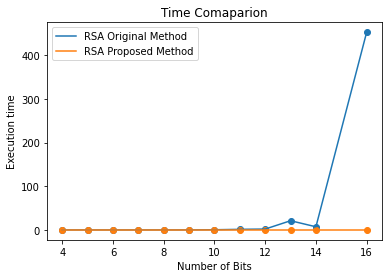

In [8]:
plt.plot(n_bit[:12],time_gen[:12],label='RSA Original Method')
plt.plot(n_bit[:12],time_pro[:12],label='RSA Proposed Method')
plt.scatter(n_bit[:12],time_gen[:12])
plt.scatter(n_bit[:12], time_pro[:12])
plt.xlabel('Number of Bits')
plt.ylabel('Execution time')
plt.title('Time Comaparion')
plt.legend()
plt.show()

In [9]:
eff=[]
k=0
for i in range(1,12):
  k=((time_gen[i]-time_pro[i])/(time_gen[i]))*100
  eff.append(k)
e=sum(eff)/len(eff)
print('The Average Efficiency Calculated For RSA Proposed Method : {}'.format(e))

The Average Efficiency Calculated For RSA Proposed Method : 95.01374176790029


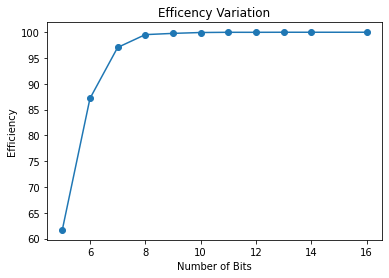

In [10]:
plt.plot(n_bit[1:12],eff)
plt.scatter(n_bit[1:12],eff)
plt.xlabel('Number of Bits')
plt.ylabel('Efficiency')
plt.title('Efficency Variation')
plt.show()

In [11]:
for i in n_bit[12:]:
  time_gen.append('Unresponsive')
  eff.append('Null')

In [12]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ['Number of Bits','Proposed RSA Method','General RSA Method','Efficiency']
for i in range(1,l):
  x.add_row([n_bit[i],time_pro[i],time_gen[i],eff[i-1]])
x.add_row(['','Average Time ='+str(sum(time_pro)/len(time_pro))+' s','Average Time ='+str(sum(time_gen[:12])/len(time_gen[:12]))+' s','Average Efficiency ='+str(e)+'%'])
print(x)

+----------------+-------------------------------------+-----------------------------------+----------------------------------------+
| Number of Bits |         Proposed RSA Method         |         General RSA Method        |               Efficiency               |
+----------------+-------------------------------------+-----------------------------------+----------------------------------------+
|       5        |        0.00012111663818359375       |       0.0003161430358886719       |           61.68929110105581            |
|       6        |        0.00011181831359863281       |       0.0008714199066162109       |           87.16826265389876            |
|       7        |        0.00012111663818359375       |       0.0041103363037109375       |           97.05336426914153            |
|       8        |        0.00010132789611816406       |        0.021962642669677734       |           99.53863522872837            |
|       9        |        0.00013184547424316406       |      